<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/m6CV/d7/sol/sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

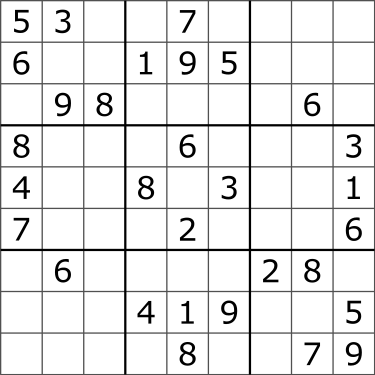

In [2]:
sudokuimc = cv2.imread('sudoku.png')
sudokuim = cv2.cvtColor(sudokuimc, cv2.COLOR_BGR2GRAY)
cv2_imshow(sudokuim)

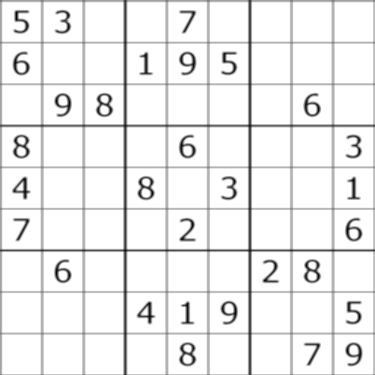

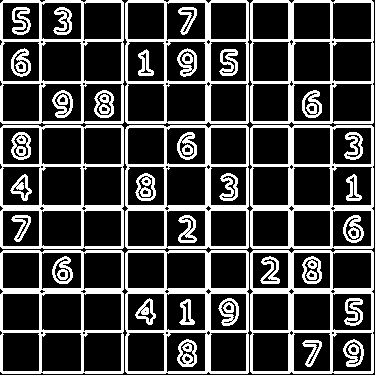

In [3]:
sudokuim1 = sudokuim.copy()
#execute some preprocessing like get rid of noise by gausssian dilate it inv the colors by threshold
sudokuim1 = cv2.GaussianBlur(sudokuim1,(3,3),3)


rt, thresh = cv2.threshold(sudokuim1, 200,255, cv2.THRESH_BINARY_INV)
canny = cv2.Canny(thresh,1,250 )


kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]], np.uint8)
dilated = cv2.dilate(sudokuim1, (9,9))
dilatedc = cv2.dilate(canny,kernel)
cv2_imshow(dilated)
cv2_imshow(dilatedc)

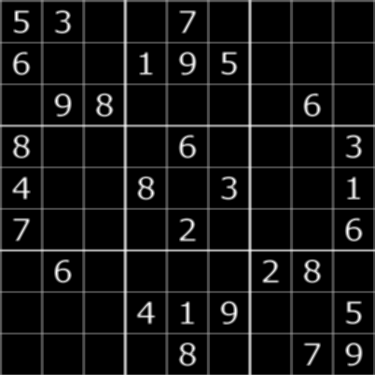

In [4]:

dilated = cv2.bitwise_not(dilated)
cv2_imshow(dilated)

In [5]:
c, h= cv2.findContours(dilatedc, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)


In [6]:
len(c)

238

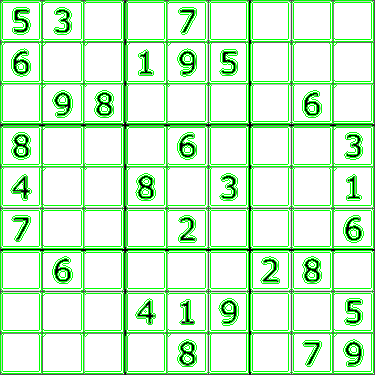

In [17]:
sudokuimcc = sudokuimc.copy()
cv2.drawContours(sudokuimc, c,-1,(0,255,0),1)
cv2_imshow(sudokuimcc) #external boundry

In [7]:
@